## Abhiram MV - Data Science and Business Analytics
### From the dataset, predict the optimum number of clusters and represent it visually.

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Importing the Dataset

In [2]:
df = pd.read_csv('Iris.csv') #Reading the CSV and converting to dataframe

In [3]:
df.head() #Displaying first few rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Looks like there are no missing values!

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

#### Data Visualisation

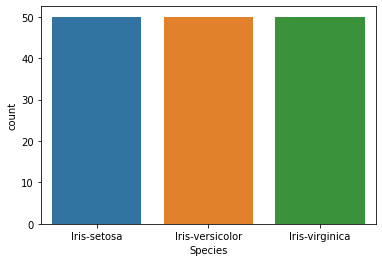

In [10]:
sns.countplot(x='Species',data=df)

We can see that we have equal number of each type of species in the dataset

In [11]:
df.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

#### Scatter plot

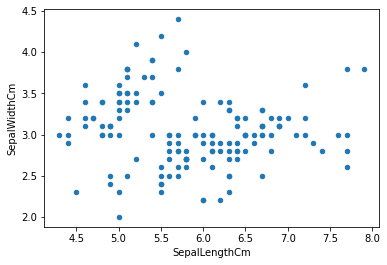

In [12]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

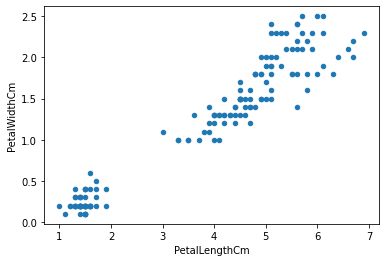

In [13]:
df.plot(kind="scatter", x="PetalLengthCm", y="PetalWidthCm")

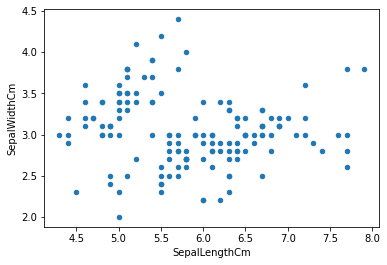

In [14]:
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")
plt.show()

We have some missing information because we do not know what species each plant<br>
We will use Seaborn's FacetGrid to display a scatterplot by species

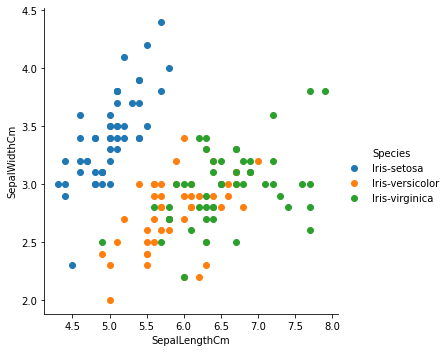

In [15]:
sns.FacetGrid(df, hue="Species",height=5) .map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()

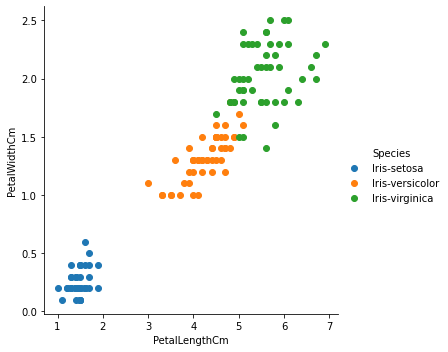

In [16]:
sns.FacetGrid(df, hue="Species",height=5) .map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
plt.show()

In [17]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


#### Heatmap

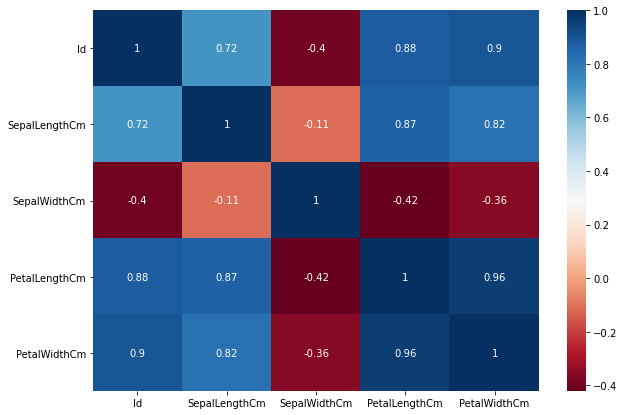

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df.corr(),annot=True,cmap='RdBu')
plt.show()

#### Pairplot

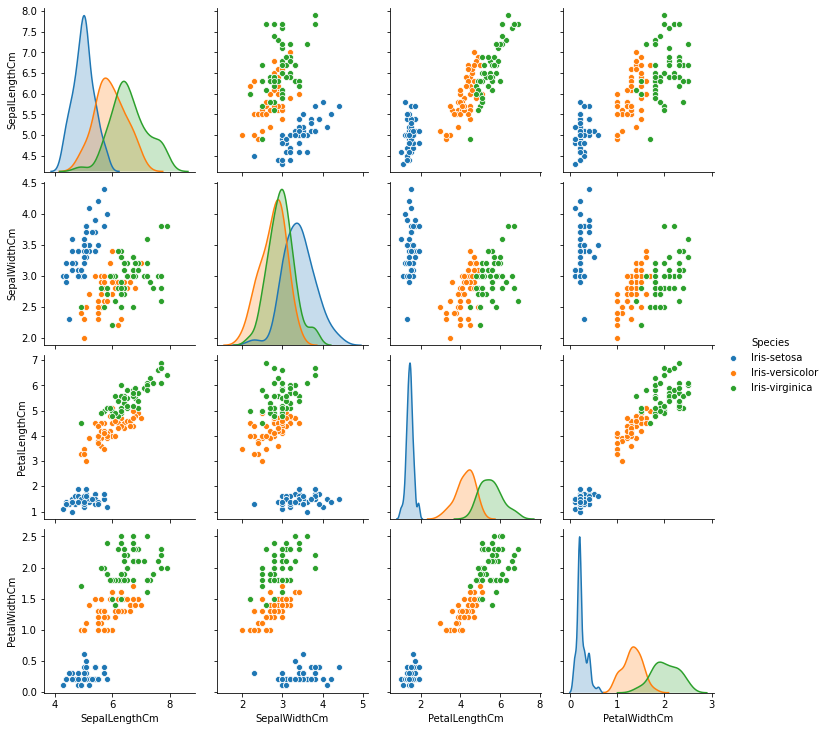

In [19]:
sns.pairplot(df.drop('Id',axis=1),hue='Species') #We do not want to plot ID column also
plt.show()

#### Applying KNN Algorithm to predict the optimum number of clusters

In [20]:
from sklearn.neighbors import KNeighborsClassifier

#### Choosing a K Value
We will use the elbow method to pick a good value for K

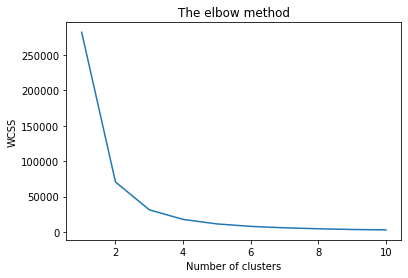

In [21]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results in the form of a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

#### Creating the kmeans classifier

In [22]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 42)
pred = kmeans.fit_predict(x)

#### Visualising the clusters and plotting the Centroids for the Clusters

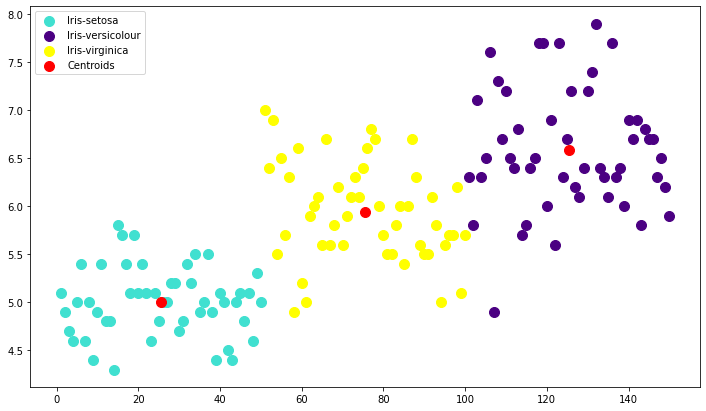

In [23]:
plt.figure(figsize=(12,7))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'turquoise', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'indigo', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'red', label = 'Centroids')

plt.legend()
plt.show()

#### We can see from the above visual represenation that there are 3 clusters for each type of species